Welcome to my first data project! This is a simple project on stocks, and the object was to play around and get familiar with Python. A lot of results might not add too much value when purchasing stocks. Following methods would be discussed:
1. Pulling stock information by using pandas
2. Visualizing different aspects of the stock info
3. Risk analysis
4. Predicting future stock prices through a Monte Carlo method


In [2]:
#import some packages 
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [3]:
# DateReader to read stock data from yahoo
from pandas.io.data import DataReader
# Time stamps 
from datetime import datetime
# Solve floting issues 
from __future__ import division 

/Users/xikaizhao/anaconda2/lib/python2.7/site-packages/pandas/io/data.py:35: FutureWarning: 
The pandas.io.data module is moved to a separate package (pandas-datareader) and will be removed from pandas in a future version.
After installing the pandas-datareader package (https://github.com/pydata/pandas-datareader), you can change the import ``from pandas.io import data, wb`` to ``from pandas_datareader import data, wb``.
  FutureWarning)


In [4]:
#Create a list of stocks I want to analyze. Coca Cola, Star Bucks, and Pepsi
my_list=['KO','SBUX','PEP']

In [5]:
#Set up time stamps. Last 5 years 
end =datetime.now()
start=datetime(end.year-5,end.month,end.day)

In [6]:
#Globals take a string as a global varilble. For loop for grabbing yahoo finance data and treating each item as a dataframe

for stock in my_list:
    globals()[stock]=DataReader(stock,'yahoo',start,end)

In [7]:
# quick summary for 
KO.tail(4)

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2016-04-18,46.099998,46.279999,45.820000,46.220001,11482300,46.220001
2016-04-19,46.310001,46.619999,46.150002,46.599998,14182600,46.599998
2016-04-20,45.340000,45.380001,44.060001,44.369999,40284900,44.369999
2016-04-21,44.259998,44.279999,42.869999,43.660000,36985500,43.660000


In [8]:
# Summary Stats for KO(Coca Cola)

KO.describe()

,Open,High,Low,Close,Volume,Adj Close
count,1257.000000,1257.000000,1257.000000,1257.000000,1.257000e+03,1257.000000
mean,48.327717,48.634264,48.028775,48.345354,1.541239e+07,36.427715
std,13.352512,13.439539,13.268742,13.365633,6.479884e+06,4.308811
min,35.880001,36.279999,35.580002,35.970001,3.036600e+06,27.798651
25%,39.700001,39.980000,39.439999,39.680000,1.137140e+07,33.578781
50%,41.520000,41.790001,41.330002,41.580002,1.397690e+07,37.006194
75%,65.440002,65.830002,64.849998,65.400002,1.758890e+07,39.626070
max,81.010002,81.330002,80.620003,81.120003,9.896750e+07,46.889999


In [9]:
#general Info
KO.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1257 entries, 2011-04-25 to 2016-04-21
Data columns (total 6 columns):
Open         1257 non-null float64
High         1257 non-null float64
Low          1257 non-null float64
Close        1257 non-null float64
Volume       1257 non-null int64
Adj Close    1257 non-null float64
dtypes: float64(5), int64(1)
memory usage: 68.7 KB


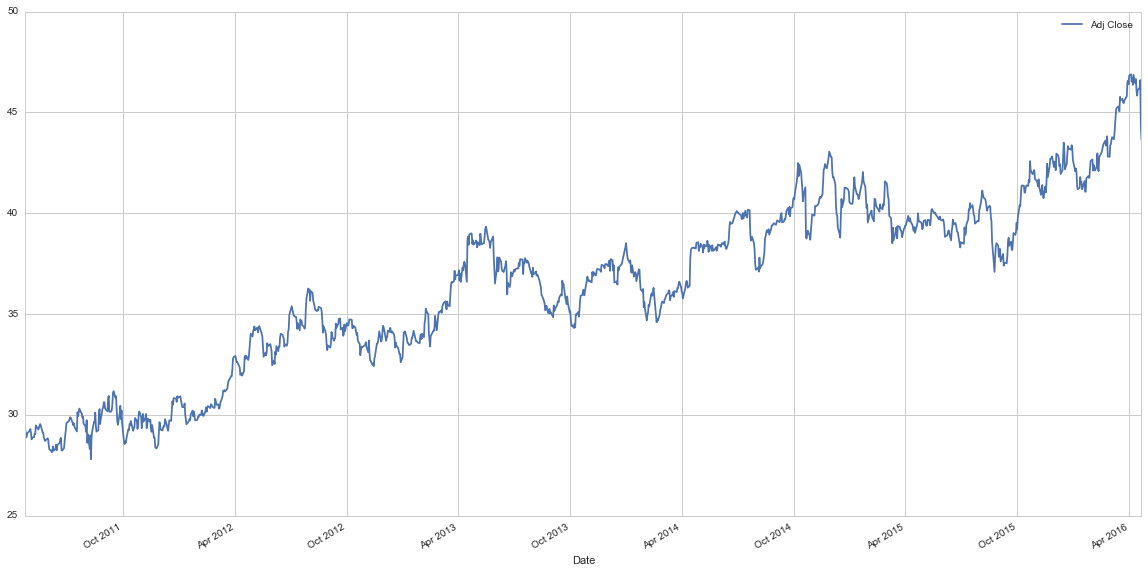

In [86]:
#This is a historical view of the closing price for KO in the past 5 years. 
#The chart is showing KO has been growing stably. 

KO['Adj Close'].plot(legend=True,figsize=(20,10));

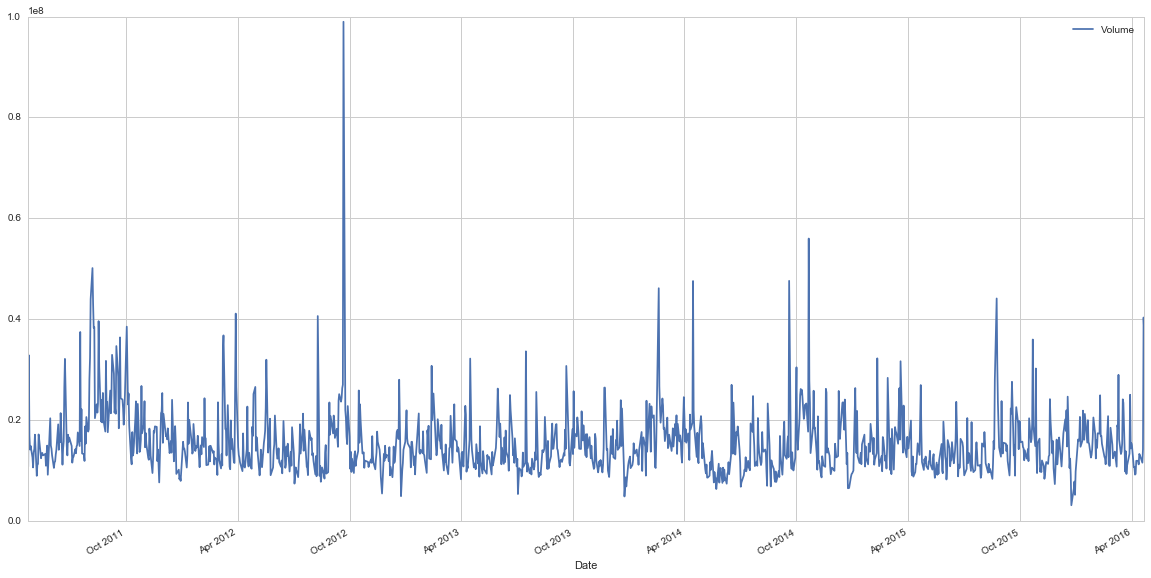

In [87]:
#This is the total volume of stock being traded each day in the past 5 years
#What happened to the peak near 2012 oct? It's worth invetigate. 
KO['Volume'].plot(legend=True,figsize=(20,10));

In [12]:
#Follwoing is a rolling mean calculator. A moving average (MA) is a trend-following or lagging indicator
#because it is based on past prices. 


ma_day=[10,20,50]
for ma in ma_day:
    column_name= "MA for %s days" %(str(ma))
    KO[column_name]=pd.rolling_mean(KO['Adj Close'],ma)

/Users/xikaizhao/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:8: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10,center=False).mean()
/Users/xikaizhao/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:8: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=20,center=False).mean()
/Users/xikaizhao/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:8: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=50,center=False).mean()


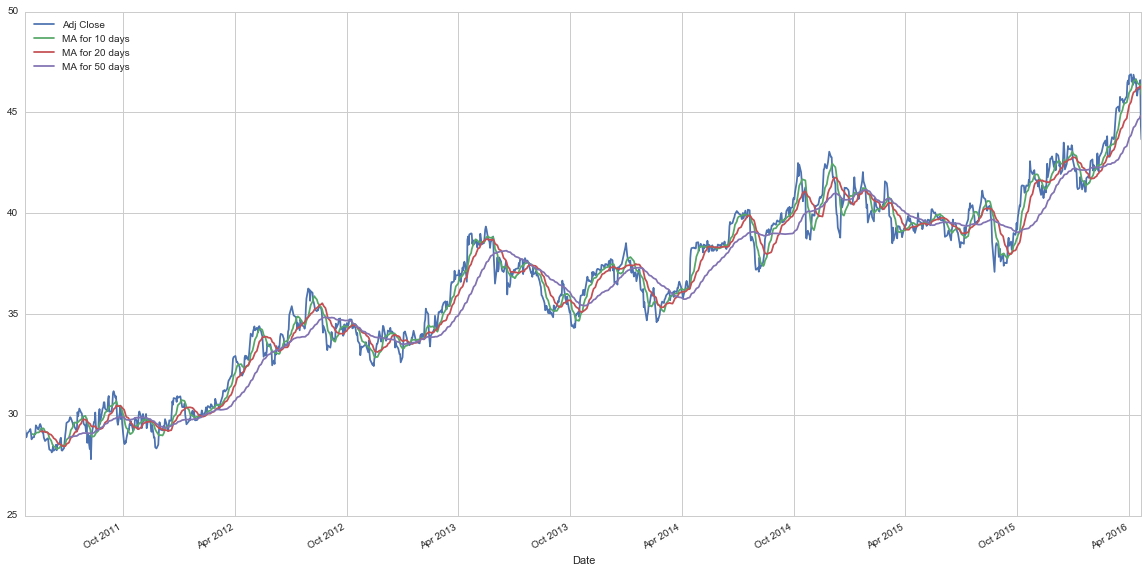

In [88]:
KO[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(20,10));

Section 2 - Daily Return Analysis

I take a closer look at the daily changes of the stock, and not just its absolute value. 


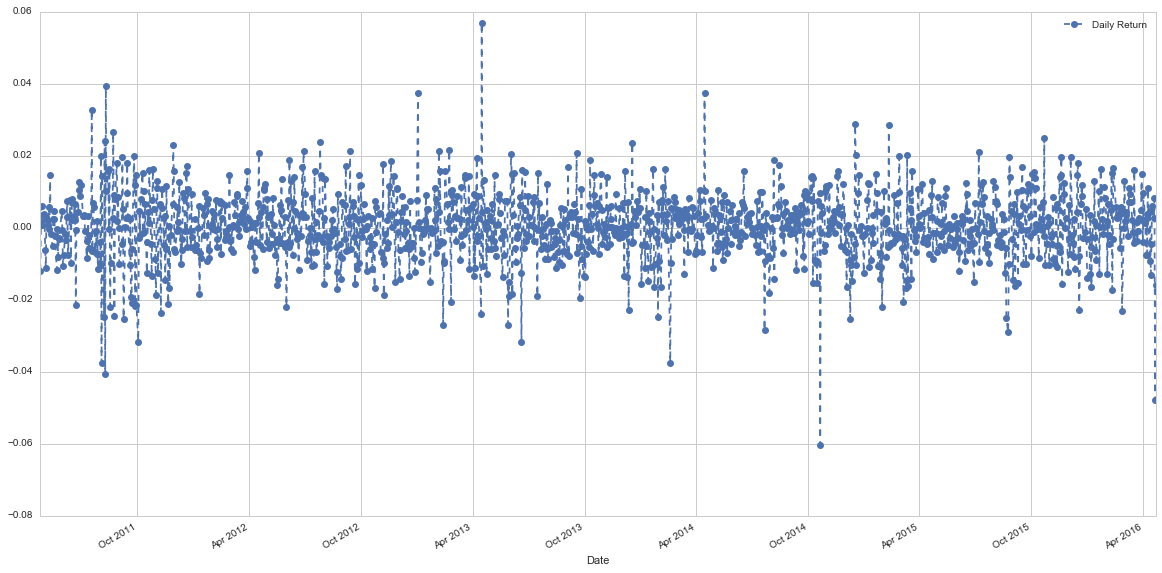

In [89]:
#Use pct_change to find the percent change for each day
KO['Daily Return']=KO['Adj Close'].pct_change()
#Plot the daily return percentage 
KO['Daily Return'].plot(figsize=(20,10),legend=True,linestyle='--',marker='o');

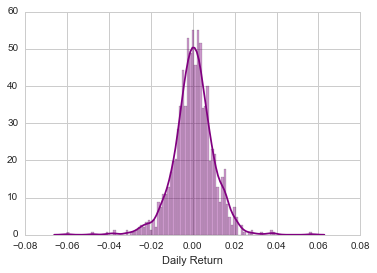

In [17]:
#Below is the distribution of the Daily Return. 
#Normal distribution with a relatively low standard deviation 
sns.distplot(KO['Daily Return'].dropna(),bins=100,color='purple')

Now let's analyze the clsing price across Coca Cola, Star Bucks, and Pepsi. 

In [21]:
#Grab the closing price info for stocks in my_list
closing_df=DataReader(my_list,'yahoo',start,end)['Adj Close']

In [22]:
#Quick look of all these three stocks
closing_df.head()

,KO,PEP,SBUX
Date,,,
2011-04-25,29.229919,57.892382,17.191934
2011-04-26,28.880404,58.479684,17.066036
2011-04-27,28.910609,58.669694,17.341145
2011-04-28,29.087526,60.215680,17.196598
2011-04-29,29.109099,59.498825,16.879523


In [24]:
#Make a new return DataFrame
list_rets=closing_df.pct_change()

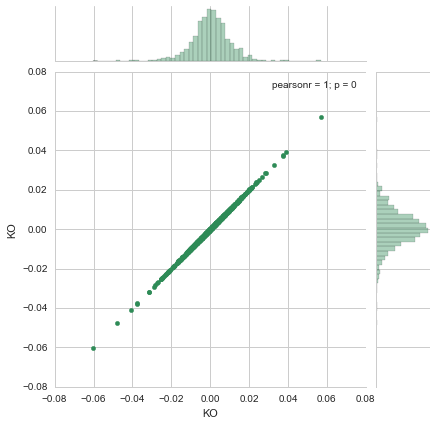

In [25]:
# Comparing the returns of Ko to itself to confirm that the correlation should be 100%
sns.jointplot('KO','KO',list_rets,kind='scatter',color='seagreen')

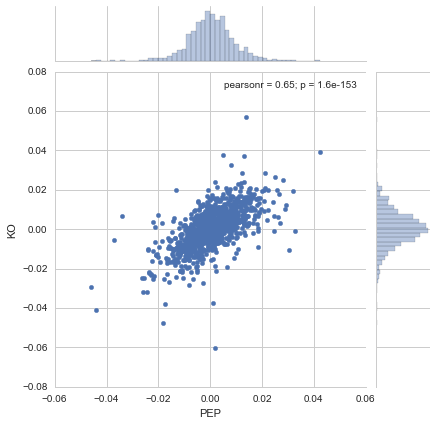

In [30]:
#Intuitively, the returns of Coca Cola should be correalated to Pepisi. Let's find out the correlation
sns.jointplot('PEP','KO',list_rets,kind='scatter')


Intersting, the pearsonr value (officially known as the Pearson product-moment correlation coefficient) can give you a sense of how correlated the daily percentage returns are. You can find more information about it at this link:

url - http://en.wikipedia.org/wiki/Pearson_product-moment_correlation_coefficient

In [36]:
list_rets.head()

,KO,PEP,SBUX
Date,,,
2011-04-25,NaN,NaN,NaN
2011-04-26,-0.011957,0.010145,-0.007323
2011-04-27,0.001046,0.003249,0.016120
2011-04-28,0.006119,0.026351,-0.008335
2011-04-29,0.000742,-0.011905,-0.018438


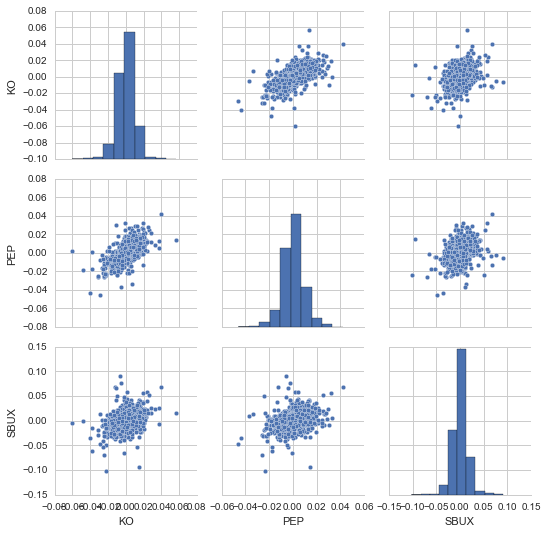

In [37]:
# Now we  can pairplot the returns between each stock, and get a feeling about the correlations
sns.pairplot(list_rets.dropna())

As expected,Coca Cola and Pepsi has a relatively strong correlation. It's worth invegitaing more

Now, let's use another method to analyze the correlation of closing price in pairs 

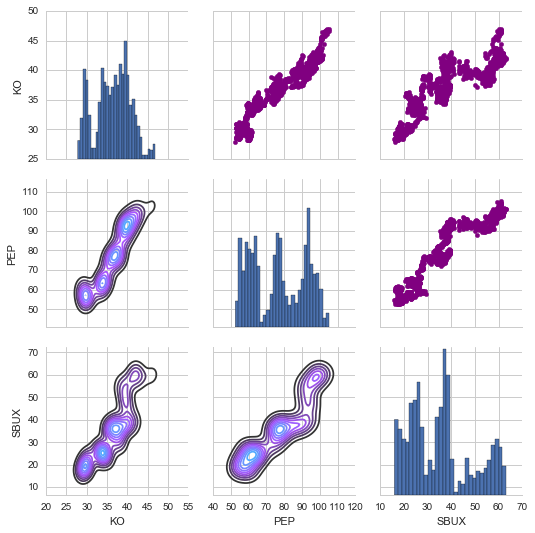

In [42]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally, define the diagonal as a series of histogram plots of the closing price
returns_fig.map_diag(plt.hist,bins=30)

As expected, PEP and KO has a strong postive correlation on closing price

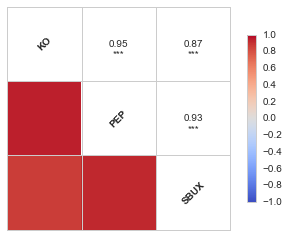

In [44]:
#This heat map shows the correlation on closing price in paris. KO and PEP has a strong correlation on closing price
#Ineresting, SBUX and PEP is quite correlated with each other too.
sns.corrplot(closing_df,annot=True)

Risk Analysis


There are many ways we can quantify risk, one of the most basic ways using the information we've gathered on daily percentage returns is by comparing the expected return with the standard deviation of the daily returns.

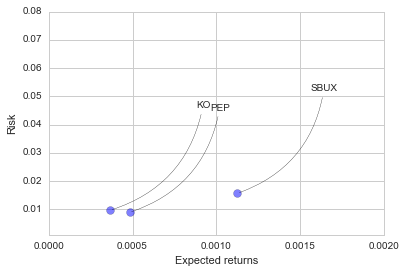

In [64]:
# Let's start by defining a new DataFrame as a clenaed version of the oriignal tech_rets DataFrame
rets = list_rets.dropna()

area = np.pi*20

plt.scatter(rets.mean(), rets.std(),alpha = 0.5,s =area)

# Set the x and y limits of the plot (optional, remove this if you don't see anything in your plot)
plt.ylim([0.001,0.08])
plt.xlim([-0.000,0.002])

#Set the plot axis titles
plt.xlabel('Expected returns')
plt.ylabel('Risk')

# Label the scatter plots, for more info on how this is done, check out the link below
# http://matplotlib.org/users/annotations_guide.html
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (100, 100),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))


Value at Risk


Let's go ahead and define a value at risk parameter for our stocks. We can treat value at risk as the amount of money we could expect to lose (aka putting at risk) for a given confidence interval. Theres several methods we can use for estimating a value at risk. Let's go ahead and see some of them in action.


Value at risk using the "bootstrap" method


For this method we will calculate the empirical quantiles from a histogram of daily returns. For more information on quantiles, check out this link: http://en.wikipedia.org/wiki/Quantile


Let's go ahead and repeat the daily returns histogram for Coca Cola stock.

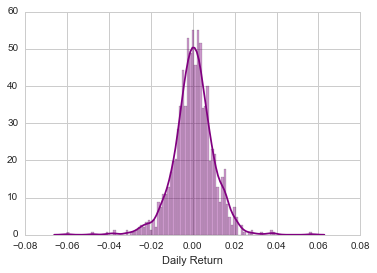

In [66]:
#Dropna() drops all the NAN values, since it can't be read by seaborn
sns.distplot(KO['Daily Return'].dropna(),bins=100,color='purple')

#With 99% confidence, the worst daily loss will not exceed 0.025*1,000,000=$25,000 
#with assumption that we had 1 million dollar investment.

rets['KO'].quantile(0.01)

The 0.01 empirical quantile of daily returns is at -0.025. That means that with 99% confidence, our worst daily loss will not exceed 2.5%. If we have a 1 million dollar investment, our one-day 1% VaR is 0.025 * 1,000,000 = $25,000.



The fun part: predict future price with MOnte Carlo method

Using the Monte Carlo to run many trials with random market conditions, then we'll calculate portfolio losses for each trial. After this, we'll use the aggregation of all these simulations to establish how risky the stock is.

Let's start with a brief explanation of what we're going to do:

We will use the geometric Brownian motion (GBM), which is technically known as a Markov process. This means that the stock price follows a random walk and is consistent with (at the very least) the weak form of the efficient market hypothesis (EMH): past price information is already incorporated and the next price movement is "conditionally independent" of past price movements.

This means that the past information on the price of a stock is independent to the future price, basically meaning, you can't perfectly predict the future solely based on the previous price of a stock.

The equation for geometric Browninan motion is given by the following equation:

$$\frac{\Delta S}{S} = \mu\Delta t + \sigma \epsilon \sqrt{\Delta t}$$ 

Where S is the stock price, mu is the expected return (which we calculated earlier),sigma is the standard deviation of the returns, t is time, and epsilon is the random variable.

We can mulitply both sides by the stock price (S) to rearrange the formula and solve for the stock price.

Now we see that the change in the stock price is the current stock price multiplied by two terms. The first term is known as "drift", which is the average daily return multiplied by the change of time. The second term is known as "shock", for each tiem period the stock will "drift" and then experience a "shock" which will randomly push the stock price up or down. By simulating this series of steps of drift and shock thousands of times, we can begin to do a simulation of where we might expect the stock price to be.

For more info on the Monte Carlo method for stocks, check out the following link:
http://www.investopedia.com/articles/07/montecarlo.asp

Now, let's take a look at Coca Cola stock.


In [74]:
# Set up our time horizon
days = 365*5

#Set up delta. You can find the defination from your calculus 101
dt=1/days

#Generate mu from expected return data
mu=rets.mean()['KO']

#let's grab the volatility of the stock from the std() of the average return
sigma=rets.std()['KO']



Next, we will create a function that takes in the starting price and number of days, and uses teh sigma and mu we already calculated form out daily returns

In [75]:
def stock_monte_carlo(start_price,days,mu,sigma):
    
    #Define a price array
    price=np.zeros(days)
    price[0]=start_price
    #Shock and Drift
    shock=np.zeros(days)
    drift=np.zeros(days)
    
    #run price array for number of days
    for x in xrange(1,days):
        
        #calculate Shock
        shock[x]=np.random.normal(loc=mu*dt,scale=sigma*np.sqrt(dt))
        #calculate Drift
        drift[x]=mu*dt
        #calculate Price
        price[x]=price[x-1]+(price[x-1]*(drift[x]+shock[x]))
        
    return price

In [78]:
#Get the start price from KO.head()
start_price=29.22

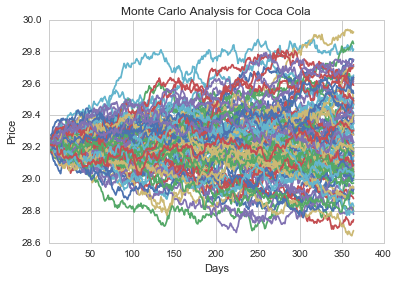

In [77]:
for run in xrange(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
    
    plt.xlabel('Days')
    plt.ylabel('Price')
    plt.title('Monte Carlo Analysis for Coca Cola')

Let's go ahead and get a histogram of the end results for a much larger run. (note: This could take a little while to run , depending on the number of runs chosen)

In [79]:
runs = 10000
simulations=np.zeros(runs)

for run in xrange(runs):
    simulations[run]=stock_monte_carlo(start_price,days,mu,sigma)[days-1]

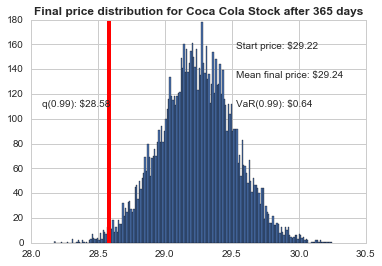

In [84]:
# Now we'lll define q as the 1% empirical qunatile, this basically means that 99% of the values should fall between here
q = np.percentile(simulations, 1)

# Now let's plot the distribution of the end prices
plt.hist(simulations,bins=200)

# Using plt.figtext to fill in some additional information onto the plot

# Starting Price
plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)
# Mean ending price
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))

# Display 1% quantile
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# Title
plt.title(u"Final price distribution for Coca Cola Stock after %s days" % days, weight='bold');

Now we have looked at the 1% empirical quantile of the final price distribution to estimate the Value at Risk for the Yahoo stock, which looks to be 0.64 for every investment of 29.22 (the price of one inital).
This basically menas for every initial stock you purchase your putting about $0.64 at risk 99% of the time from our Monte Carlo Simulation.

From all the analysis, I figured Coca Cola would be a safe stock for beginners like me, so I ended up buying some shares. 

I'm really new to stock analysis, any feedbacks would be appreciated :)
